In [6]:
!pip install pandas-datareader

     -------------------------------------- 109.5/109.5 kB 6.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [12]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader  # retrieve historical stock prices for any given symbol 
from pandas_datareader import data as pdr      # within the specified date range.

In [13]:
import yfinance as yf
# For time stamps
from datetime import datetime

In [14]:
yf.pdr_override()

In [29]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [30]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)     # last year, same month and day

In [31]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)      # globals() - used to set dataframe column names

# can also use .history(start=startDate, end=endDate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [53]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [55]:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    print(company)   # merging company name to the data

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-07-29  161.240005  163.630005  159.500000  162.509995  161.545364   
2022-08-01  161.009995  163.589996  160.889999  161.509995  160.551315   
2022-08-02  160.100006  162.410004  159.630005  160.009995  159.060196   
2022-08-03  160.839996  166.589996  160.750000  166.130005  165.143890   
2022-08-04  166.009995  167.190002  164.429993  165.809998  164.825790   
...                ...         ...         ...         ...         ...   
2023-07-24  193.410004  194.910004  192.250000  192.750000  192.750000   
2023-07-25  193.330002  194.440002  192.919998  193.619995  193.619995   
2023-07-26  193.669998  195.639999  193.320007  194.500000  194.500000   
2023-07-27  196.020004  197.199997  192.550003  193.220001  193.220001   
2023-07-28  194.669998  196.630005  194.139999  195.830002  195.830002   

               Volume company_name  


In [56]:
df = pd.concat(company_list, axis=0)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-07-29,161.240005,163.630005,159.500000,162.509995,161.545364,101786900,APPLE
2022-08-01,161.009995,163.589996,160.889999,161.509995,160.551315,67829400,APPLE
2022-08-02,160.100006,162.410004,159.630005,160.009995,159.060196,59907000,APPLE
2022-08-03,160.839996,166.589996,160.750000,166.130005,165.143890,82507500,APPLE
2022-08-04,166.009995,167.190002,164.429993,165.809998,164.825790,55474100,APPLE
2022-08-05,163.210007,165.850006,163.000000,165.350006,164.596848,56697000,APPLE
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.119019,60276900,APPLE
2022-08-09,164.020004,165.820007,163.250000,164.919998,164.168793,63135500,APPLE
2022-08-10,167.679993,169.339996,166.899994,169.240005,168.469131,70170500,APPLE


In [57]:
# descriptive statistics
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,158.435220,160.256933,156.880359,158.648605,158.287193,7.066039e+07
std,17.368964,17.178195,17.698029,17.450473,17.587156,2.320638e+07
min,126.010002,127.769997,124.169998,125.019997,124.656982,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.470383,5.383755e+07
50%,154.789993,157.089996,153.369995,155.000000,154.602554,6.643510e+07
75%,170.775002,172.294998,169.909996,171.540001,171.027412,8.135480e+07
max,196.020004,198.229996,194.139999,195.830002,195.830002,1.647624e+08


In [58]:
# information about a DataFrame
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-07-29 to 2023-07-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [75]:
# Displaying all the details of the company
MS = yf.Ticker('MSFT')

# get all key value pairs that are available
for key, value in MS.info.items():
    print(key, ":", value)

address1 : One Microsoft Way
city : Redmond
state : WA
zip : 98052-6399
country : United States
phone : 425 882 8080
fax : 425 706 7329
website : https://www.microsoft.com
industry : Software—Infrastructure
industryDisp : Software—Infrastructure
sector : Technology
longBusinessSummary : Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related Client Access Licenses; GitHub that

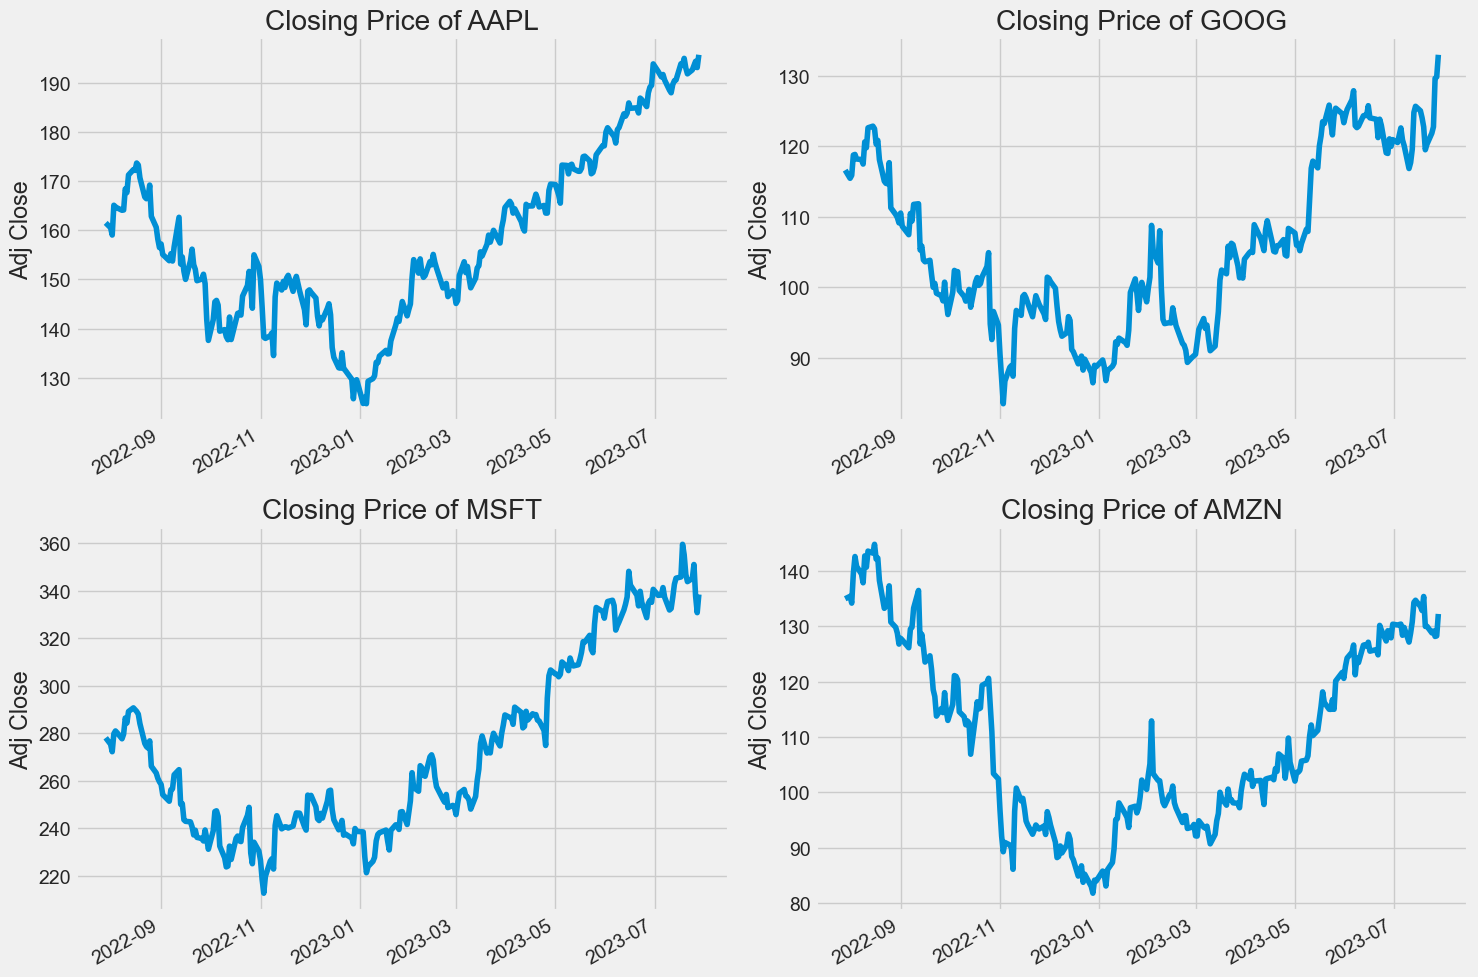

In [63]:
# The closing price is the last price at which the stock is traded during the regular trading day. 
# A stock’s closing price is the standard benchmark used by investors to track its performance over time.

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):    # keep track of the no. of iterations
    plt.subplot(2, 2, i)                       # 2 rows, 2 columns, i starts from 1
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

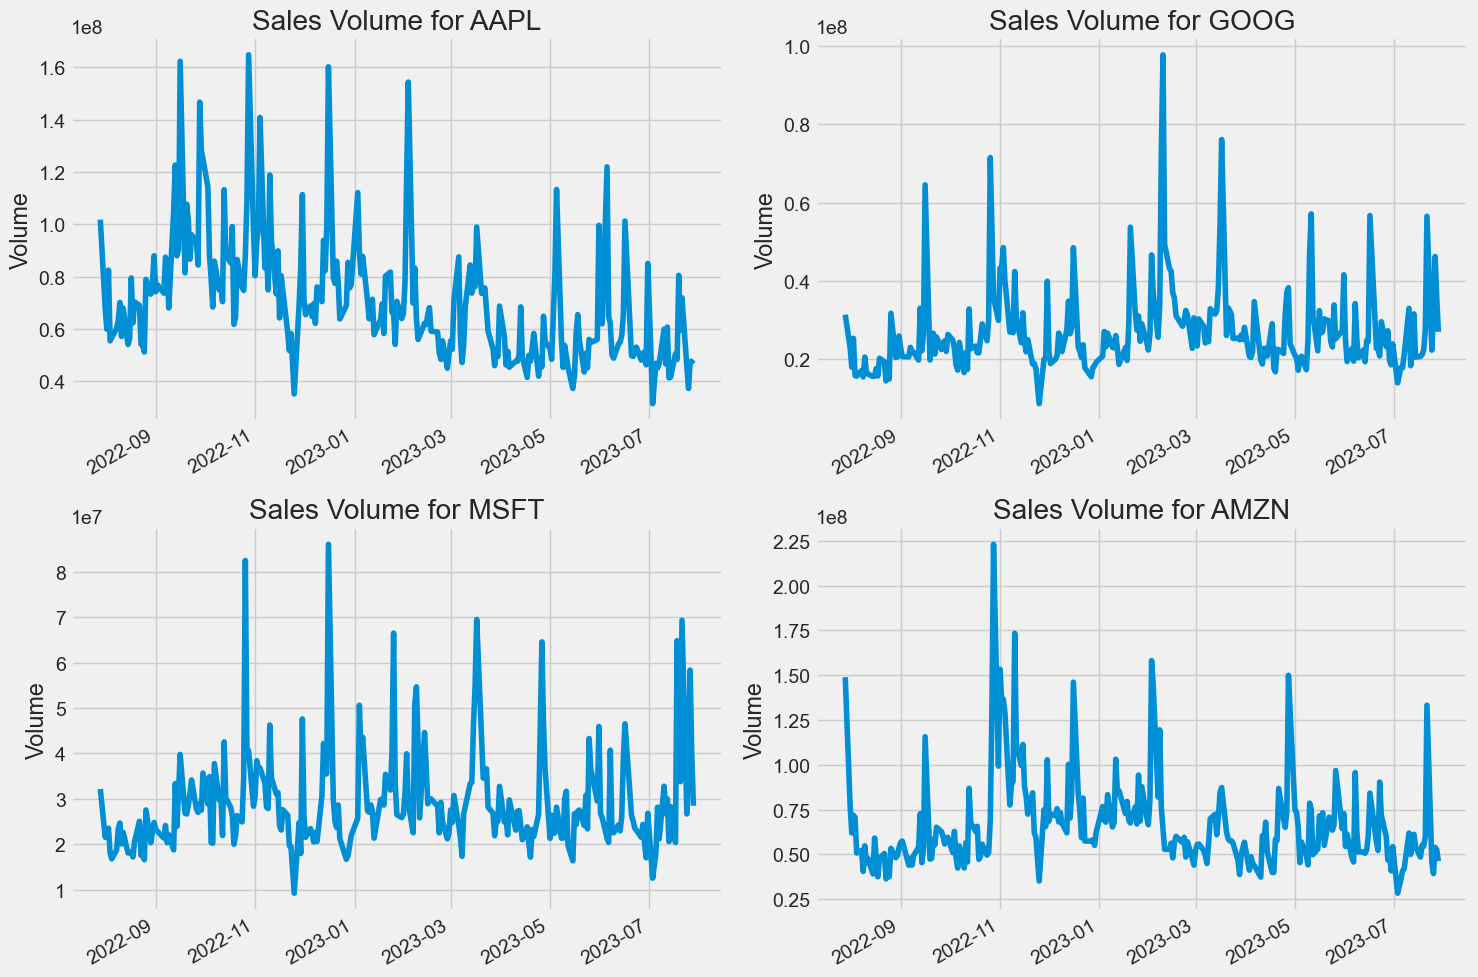

In [61]:
#  the stock trading VOLUME is the number of shares of security traded between its daily open and close.

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

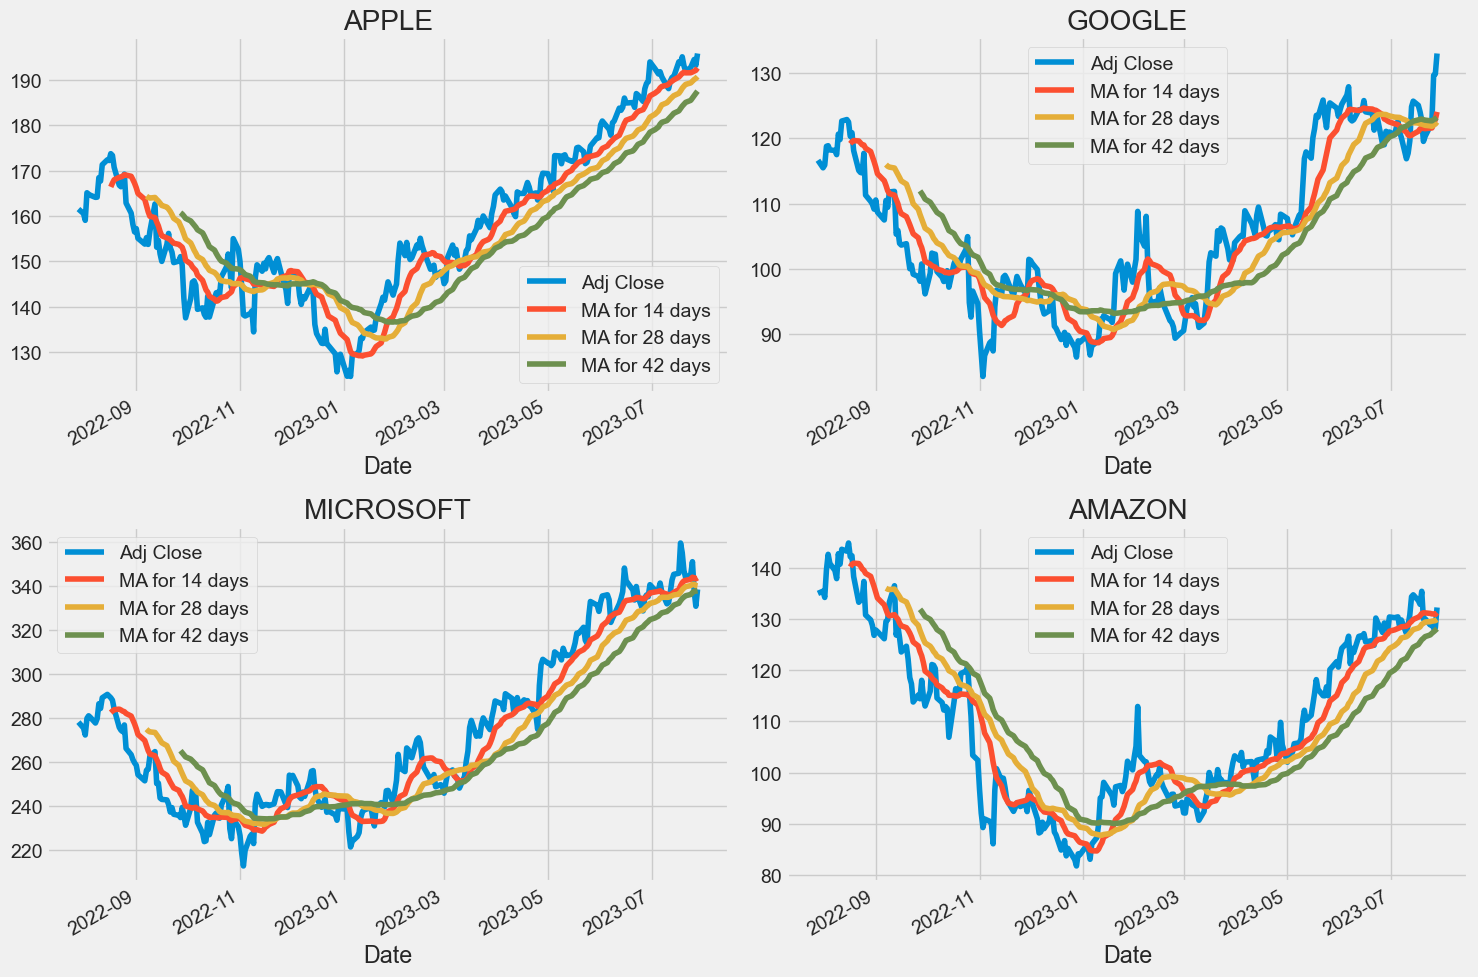

In [67]:
# Calculating MOVING AVERAGE for the stock

ma_day = [28, 56, 84]   # moving avg for 3-5 weeks

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 14 days', 'MA for 28 days', 'MA for 42 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 14 days', 'MA for 28 days', 'MA for 42 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 14 days', 'MA for 28 days', 'MA for 42 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 14 days', 'MA for 28 days', 'MA for 42 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

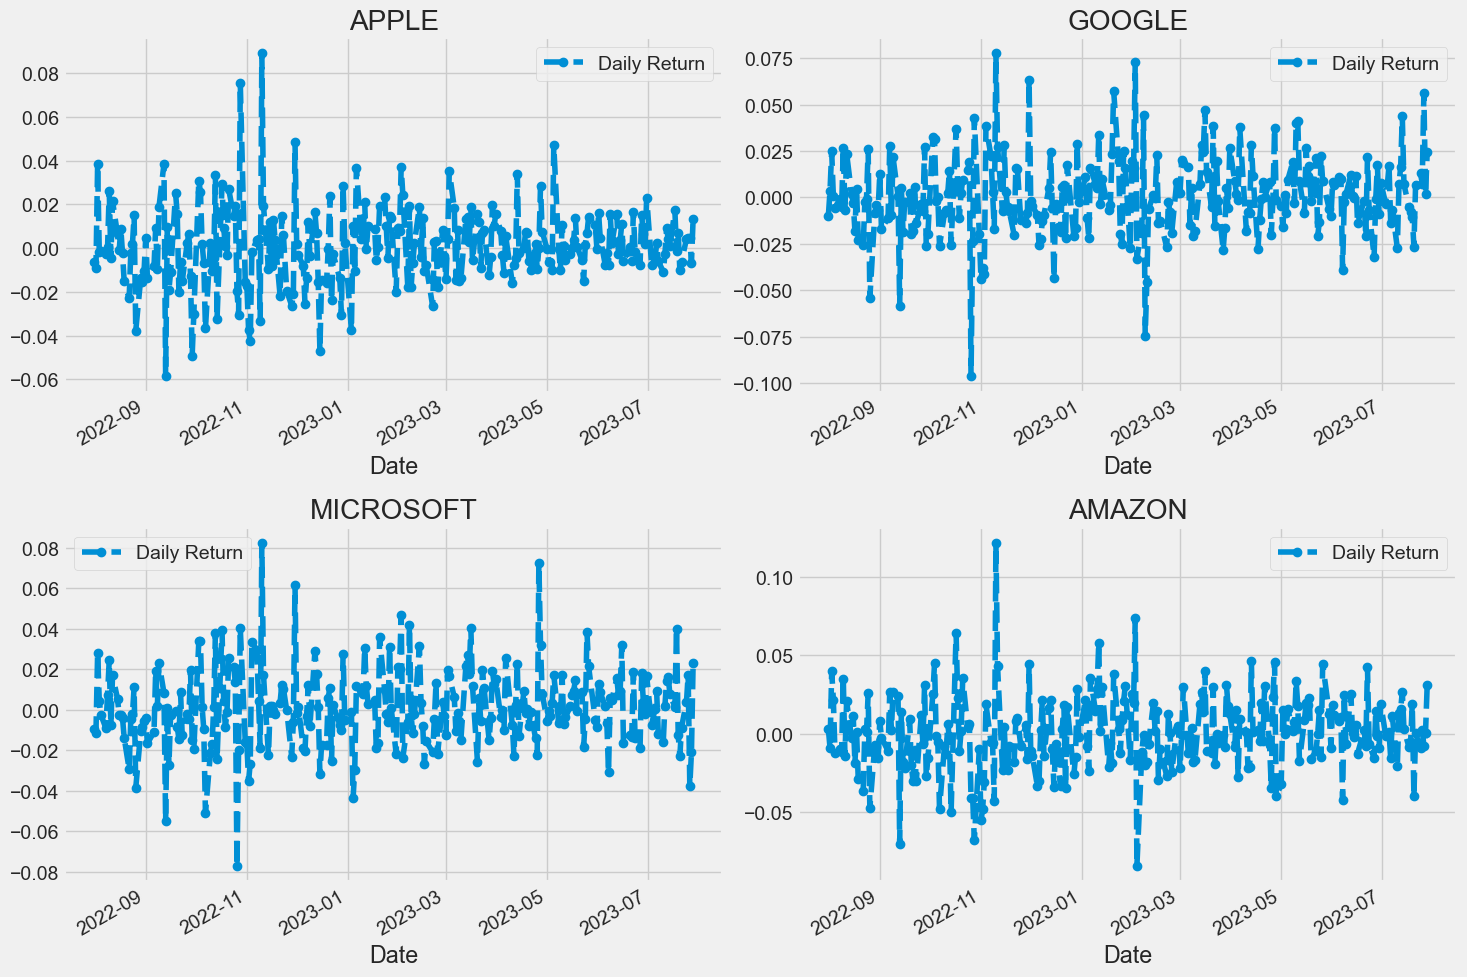

In [68]:
# analyze the risk of the stock
# look at the daily changes of the stock

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()     # percent change for each day

# plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

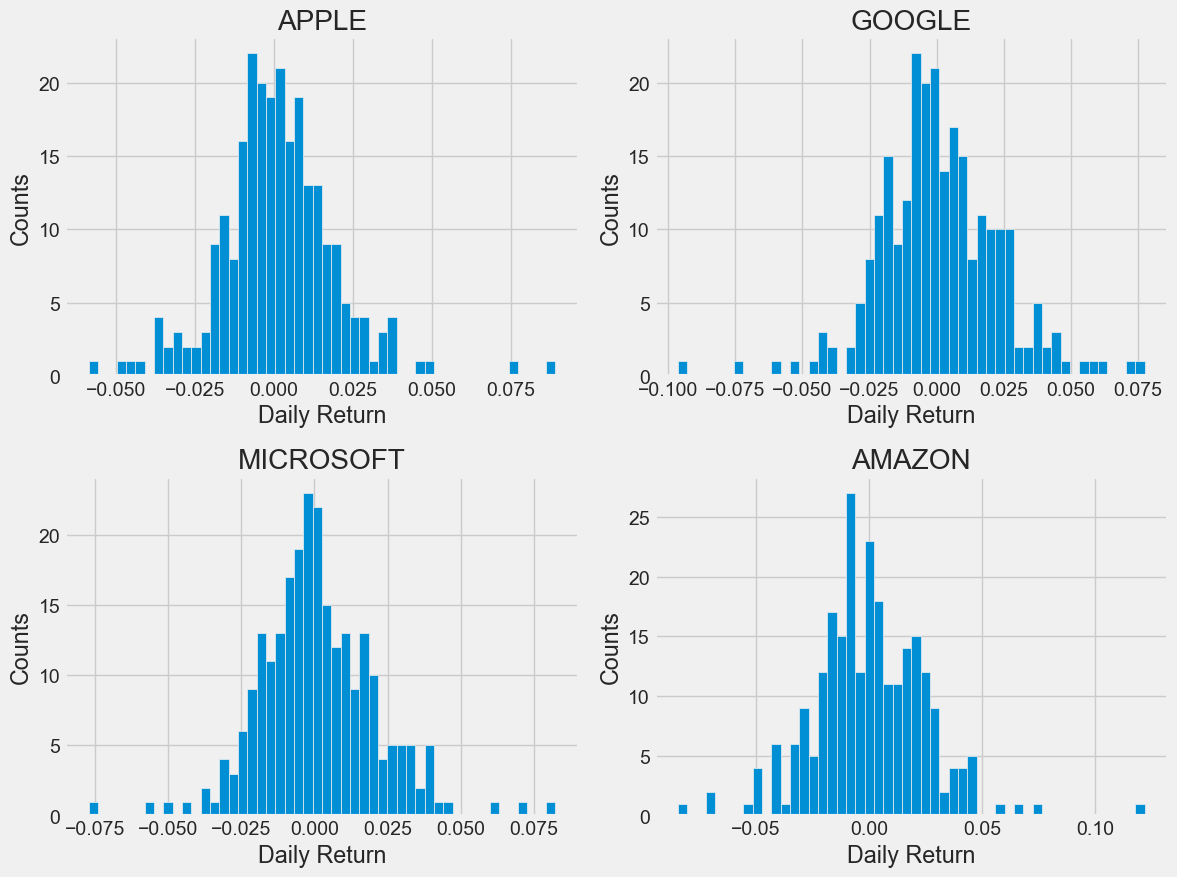

In [69]:
# Average daily return

plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [70]:
# Correlation between stocks

# Grab all the closing prices of stocks into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-07-29,NaN,NaN,NaN,NaN
2022-08-01,-0.006153,0.003260,-0.009945,-0.009724
2022-08-02,-0.009287,-0.009085,0.003637,-0.011474
2022-08-03,0.038248,0.039952,0.024849,0.027836
2022-08-04,-0.001926,0.021861,0.000758,0.004177


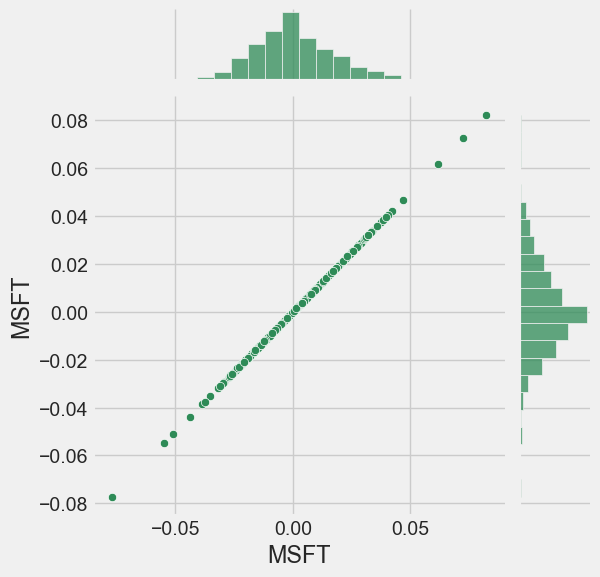

In [76]:
# Comparing Microsoft to itself should show a perfectly linear relationship

sns.jointplot(x='MSFT', y='MSFT', data=tech_rets, kind='scatter', color='seagreen')

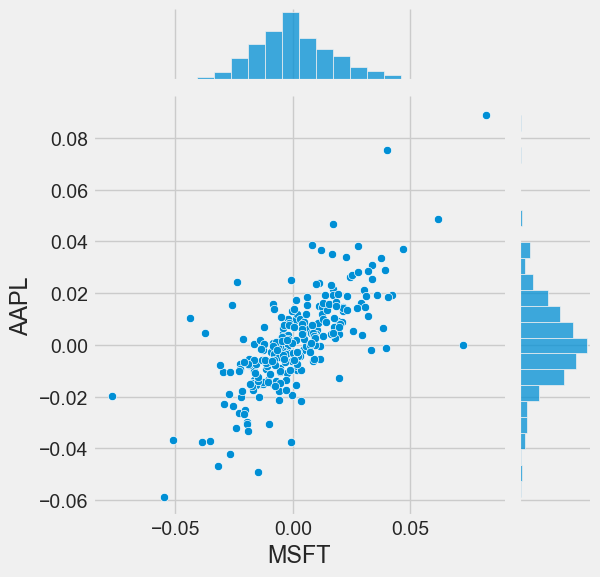

In [84]:
# joinplot to compare the daily returns of Google and Microsoft

sns.jointplot(x='MSFT', y='AAPL', data=tech_rets, kind='scatter')

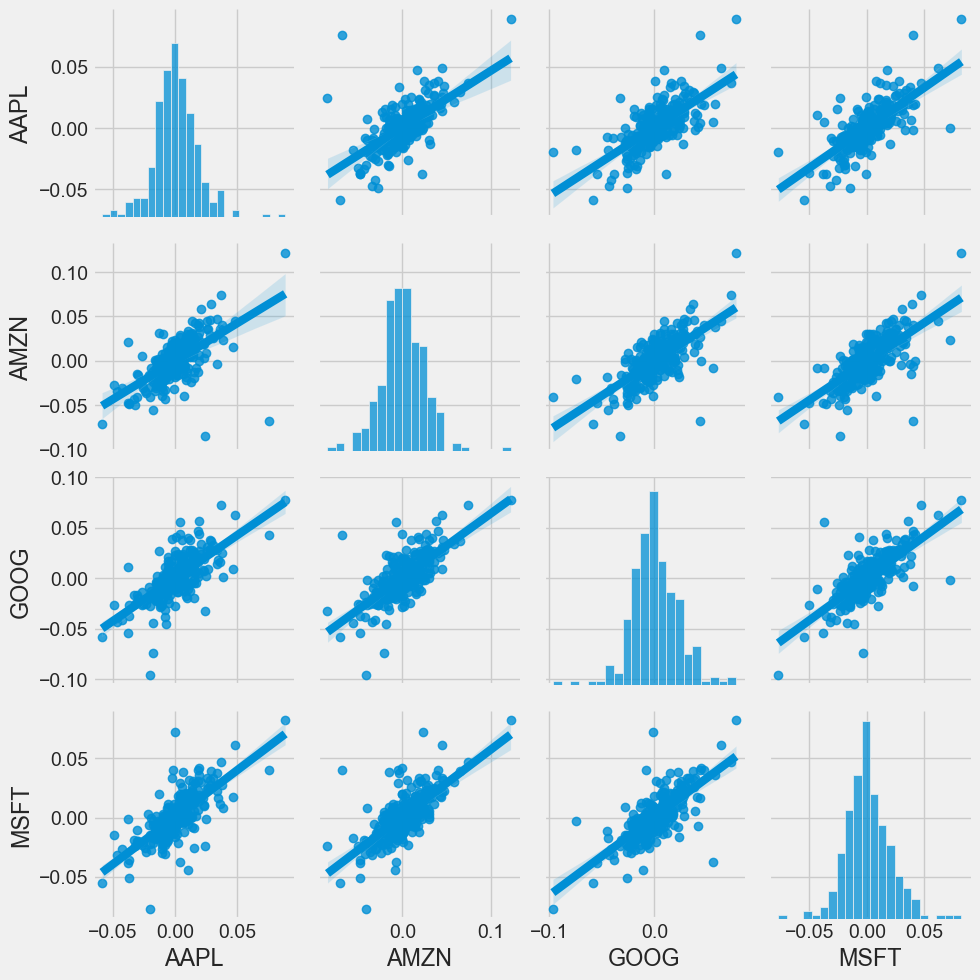

In [79]:
# paiplot to see all the stock's correlation

sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

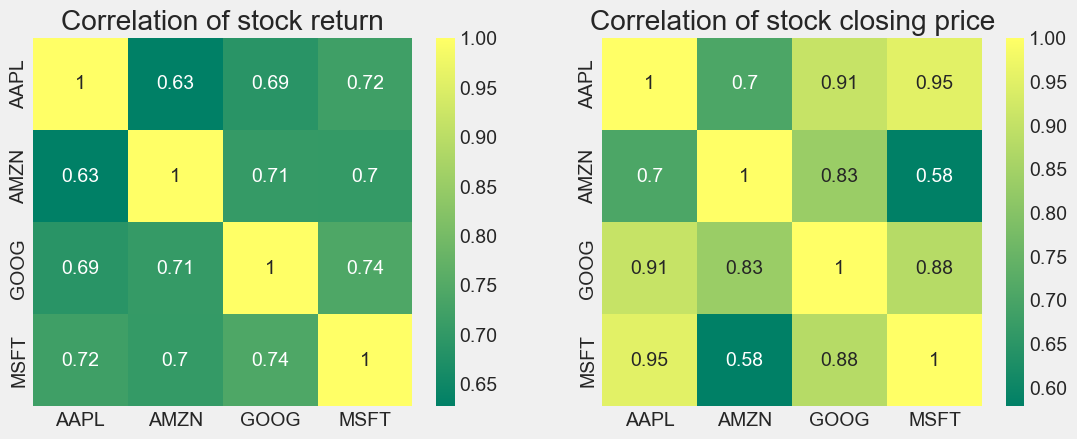

In [80]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

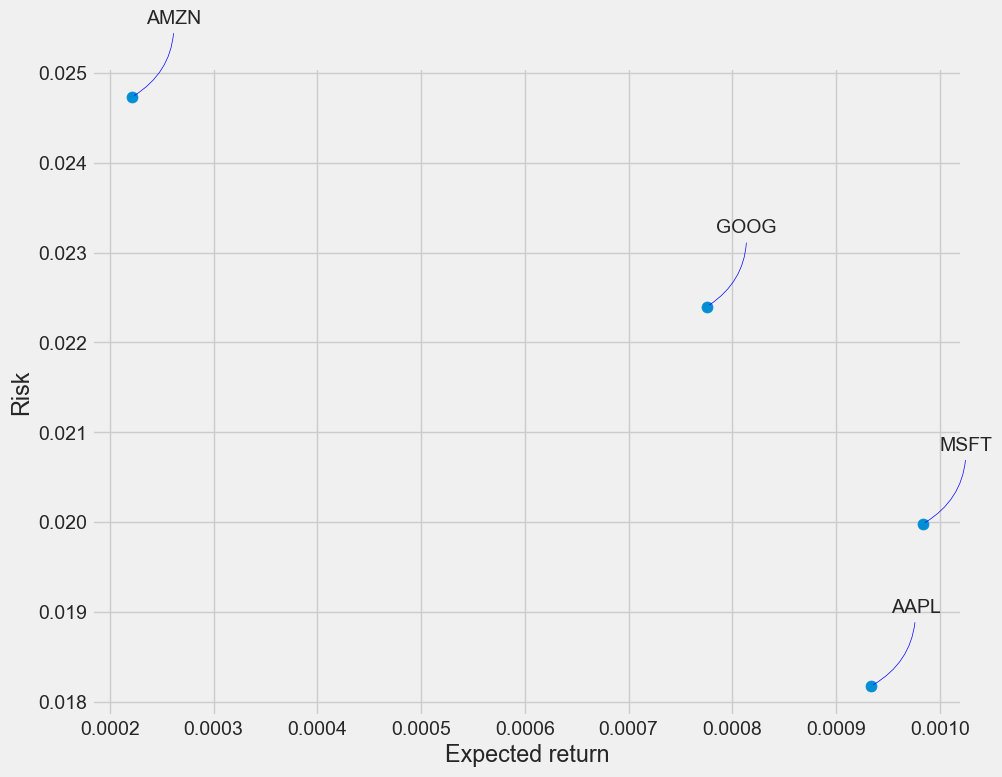

In [85]:
# Risk estimation 
# comparing the expected return(mean) with the standard deviation(std) of the daily returns.

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))